In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-movies-and-tv-shows/netflix_titles.csv


In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
import geopandas as gpd


In [3]:
# Load the dataset
df = pd.read_csv('/kaggle/input/netflix-movies-and-tv-shows/netflix_titles.csv', encoding='ISO-8859-1')

# Understanding the Data

In [4]:
# Display the first few rows of the dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Check for missing values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
Unnamed: 12     8809
Unnamed: 13     8809
Unnamed: 14     8809
Unnamed: 15     8809
Unnamed: 16     8809
Unnamed: 17     8809
Unnamed: 18     8809
Unnamed: 19     8809
Unnamed: 20     8809
Unnamed: 21     8809
Unnamed: 22     8809
Unnamed: 23     8809
Unnamed: 24     8809
Unnamed: 25     8809
dtype: int64

# Data Cleaning


In [6]:
# Columns from index 12 and afterwards are all Unnamed and Blank columns, so we have removed them in beginning.
df.drop(df.columns[12:], axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      6175 non-null   object
 4   cast          7984 non-null   object
 5   country       7978 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8805 non-null   object
 9   duration      8806 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB


In [8]:
# Fill missing values in 'director' and 'cast' columns with 'Unknown'
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')

In [9]:
# Strip any leading/trailing whitespace from 'date_added'
df['date_added'] = df['date_added'].str.strip()

In [10]:
# Standardize the date format in 'date_added'
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [11]:
# Extract year and month from 'date_added'
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [12]:
# Convert 'duration' to a consistent format
df['duration'] = df['duration'].str.replace(' min', '').str.replace(' Season', '').str.replace('s', '')
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')

# Data Exploration

In [13]:
# Summary statistics for numerical columns
df.describe()

,date_added,release_year,duration,year_added,month_added
count,8799,8809.000000,8806.000000,8799.000000,8799.000000
mean,2019-05-17 15:43:18.431640064,2014.181292,69.843629,2018.873054,6.654393
min,2008-01-01 00:00:00,1925.000000,1.000000,2008.000000,1.000000
25%,2018-04-06 00:00:00,2013.000000,2.000000,2018.000000,4.000000
50%,2019-07-02 00:00:00,2017.000000,88.000000,2019.000000,7.000000
75%,2020-08-19 12:00:00,2019.000000,106.000000,2020.000000,10.000000
max,2024-04-05 00:00:00,2024.000000,312.000000,2024.000000,12.000000
std,NaN,8.818932,50.816155,1.575962,3.436397


In [14]:
# Count unique values in categorical columns
df['type'].value_counts()
df['country'].value_counts().head(10)
df['rating'].value_counts()

rating
TV-MA       3208
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
A              1
Name: count, dtype: int64

# Data Visualization


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


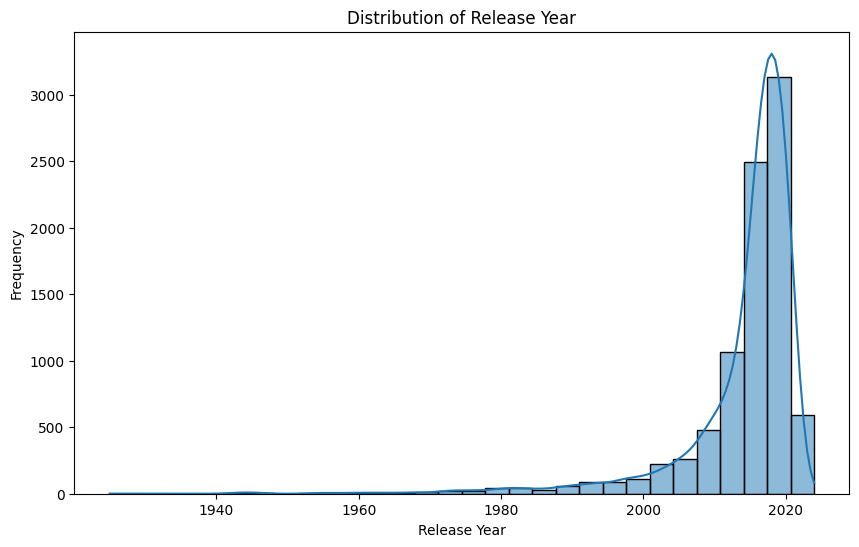

In [15]:
# Replace inf values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)


# Distribution of content release year
plt.figure(figsize=(10,6))
sns.histplot(df['release_year'].dropna(), bins=30, kde=True)
plt.title('Distribution of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

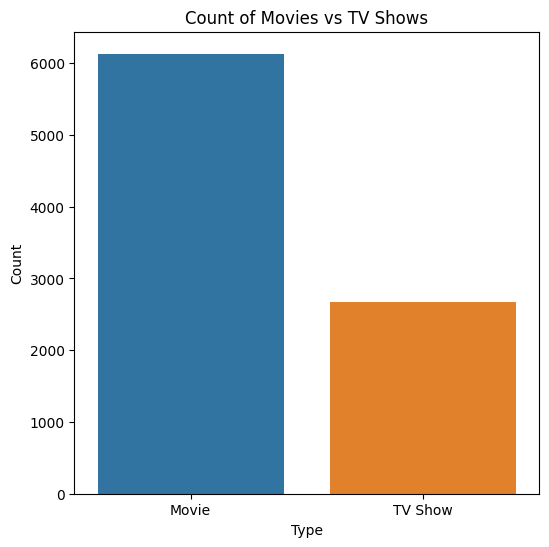

In [16]:
# Count of Movies vs TV Shows
plt.figure(figsize=(6,6))
sns.countplot(x='type', data=df)
plt.title('Count of Movies vs TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

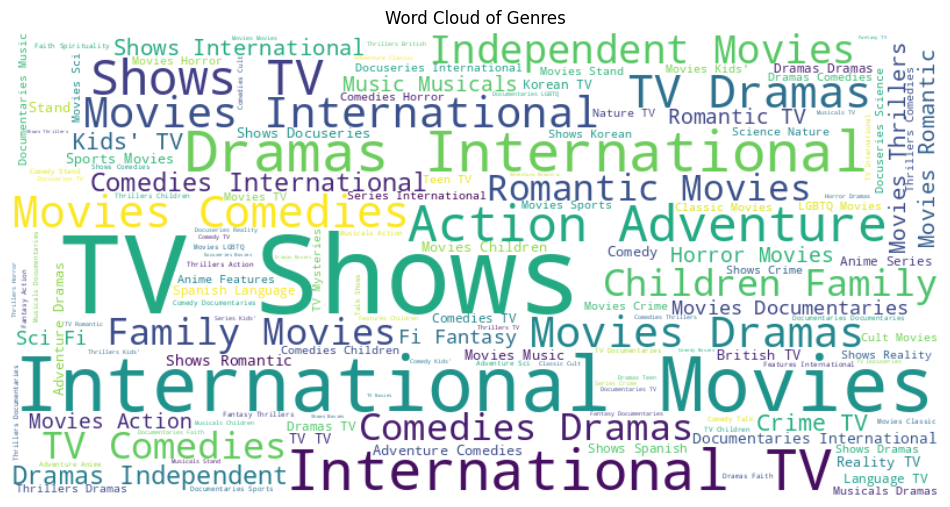

In [17]:
# Word cloud of genres
plt.figure(figsize=(12,8))
text = ' '.join(df['listed_in'].dropna().values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Genres')
plt.show()

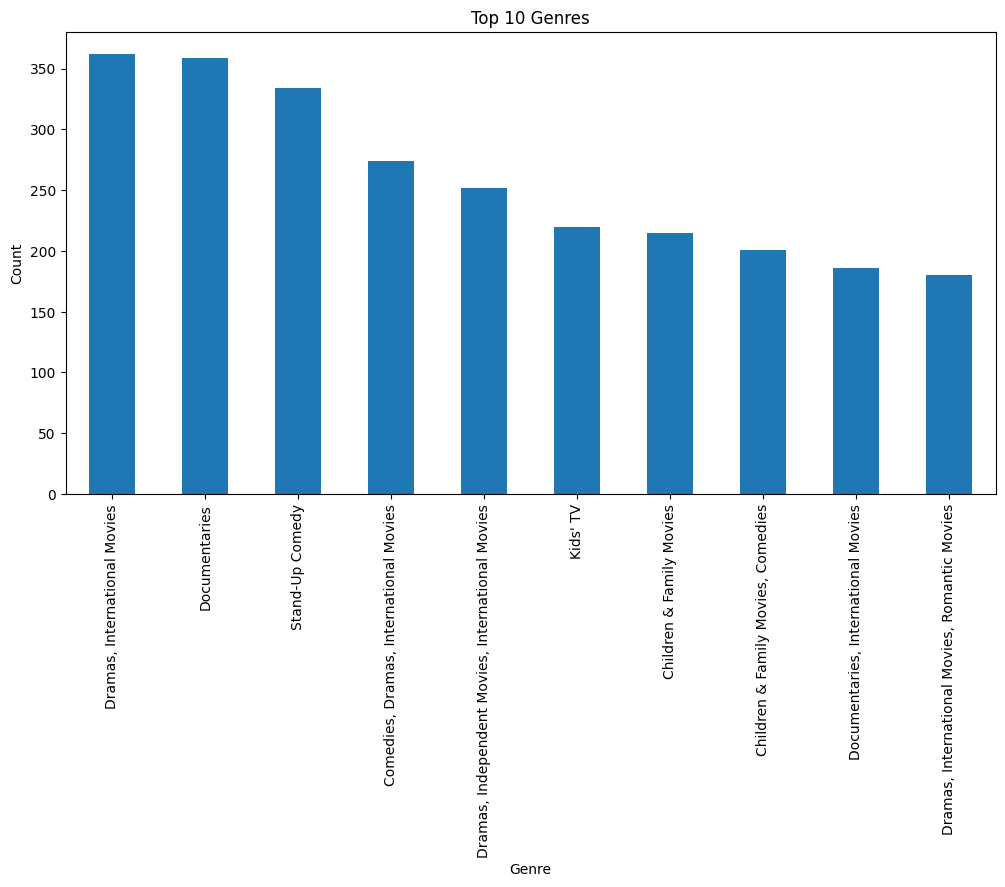

In [18]:
# Bar chart of top 10 genres
plt.figure(figsize=(12,6))
df['listed_in'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

/tmp/ipykernel_492/1448150353.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


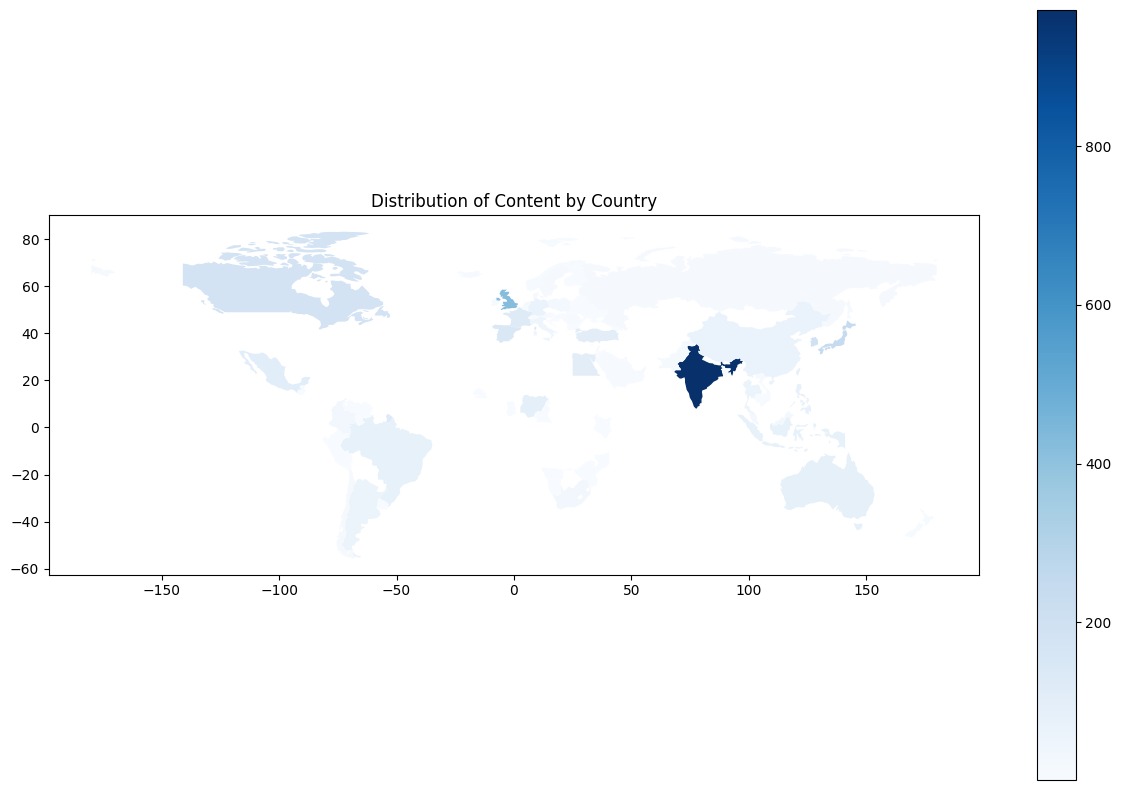

In [19]:
# Map visualization of content by country
country_counts = df['country'].value_counts()
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.set_index('name').join(country_counts.rename('count')).reset_index()
world.plot(column='count', cmap='Blues', legend=True, figsize=(15,10))
plt.title('Distribution of Content by Country')
plt.show()

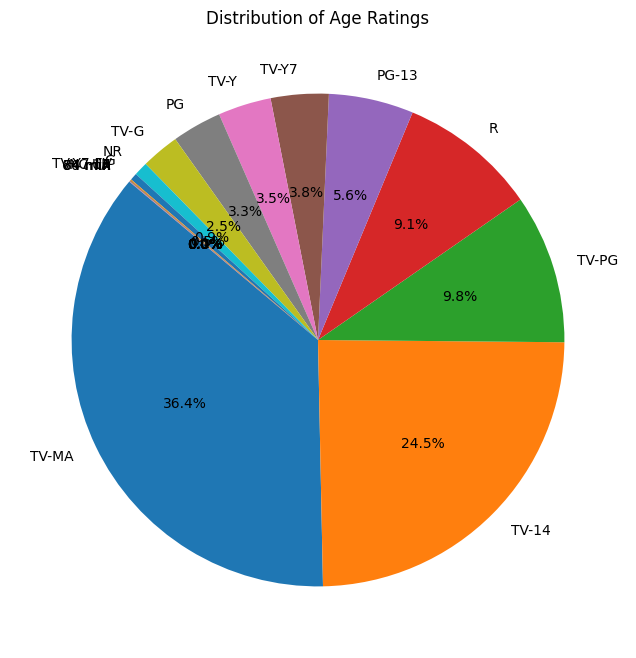

In [20]:
# Pie chart of ratings
plt.figure(figsize=(8,8))
df['rating'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Age Ratings')
plt.ylabel('')
plt.show()

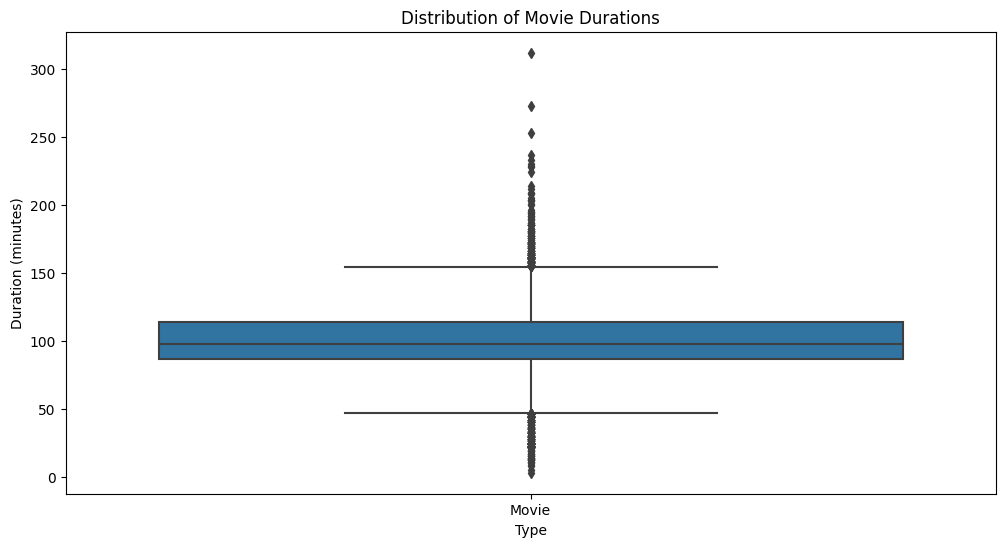

In [21]:
# Box plot of movie durations
plt.figure(figsize=(12,6))
sns.boxplot(x='type', y='duration', data=df[df['type'] == 'Movie'])
plt.title('Distribution of Movie Durations')
plt.xlabel('Type')
plt.ylabel('Duration (minutes)')
plt.show()

# Insights Generation


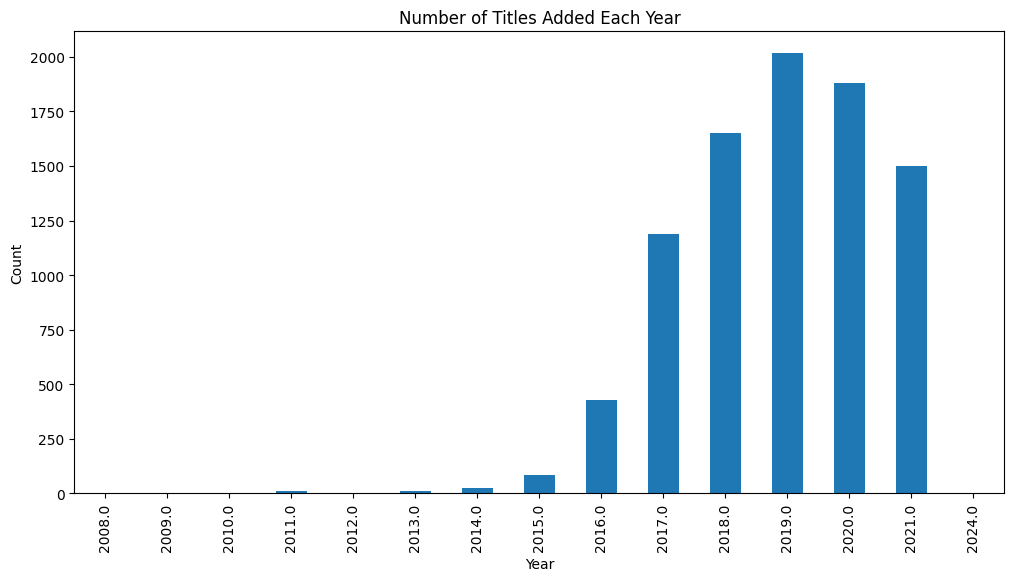

In [22]:
# Temporal Trends: Number of titles added each year
plt.figure(figsize=(12,6))
df['year_added'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Titles Added Each Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


<Figure size 1200x600 with 0 Axes>

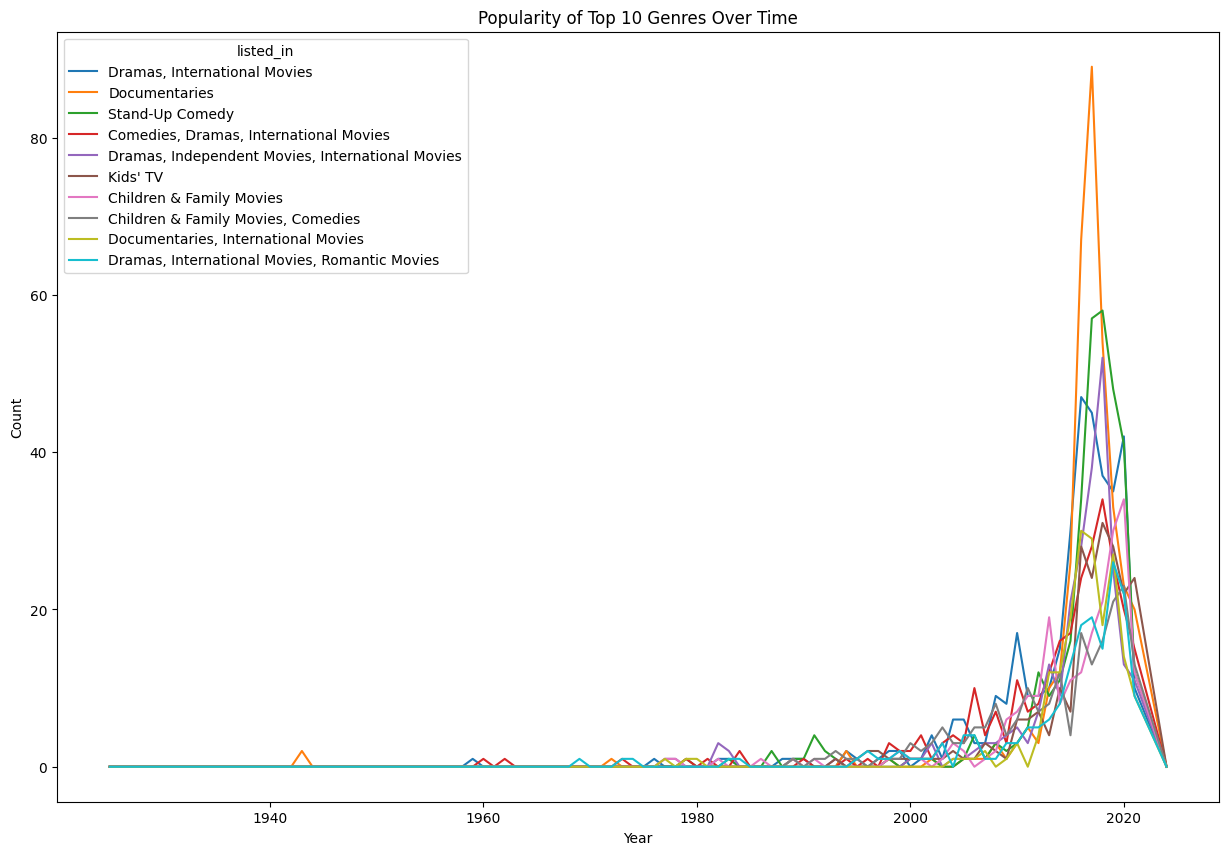

In [23]:
# Popularity of genres over time
plt.figure(figsize=(12,6))
genre_year = df.explode('listed_in').groupby(['release_year', 'listed_in']).size().unstack().fillna(0)
genre_year = genre_year[genre_year.sum().sort_values(ascending=False).index[:10]]
genre_year.plot(kind='line', figsize=(15,10))
plt.title('Popularity of Top 10 Genres Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


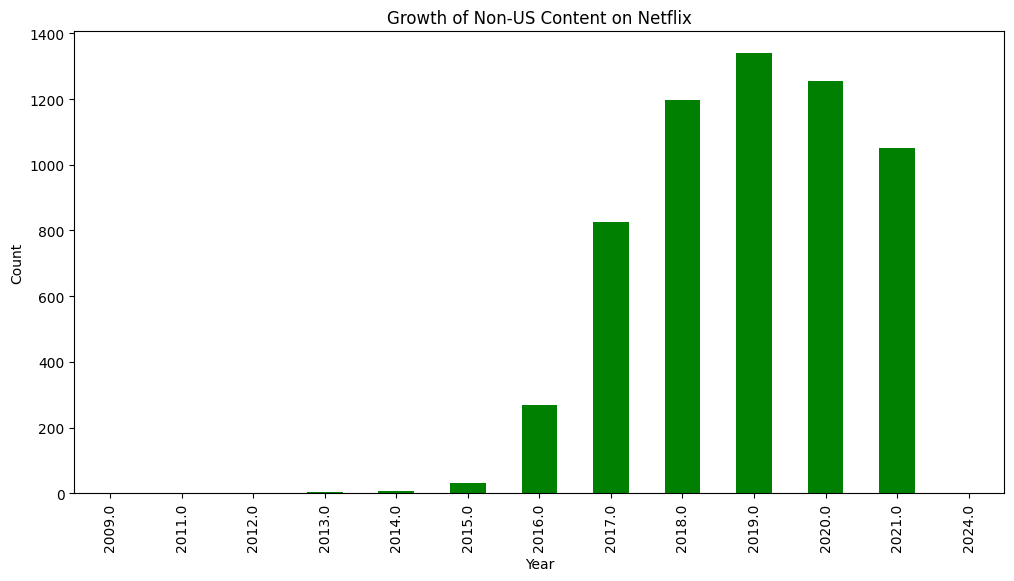

In [24]:

# Growth of non-US content
non_us_content = df[df['country'] != 'United States']
plt.figure(figsize=(12,6))
non_us_content['year_added'].value_counts().sort_index().plot(kind='bar', color='green')
plt.title('Growth of Non-US Content on Netflix')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

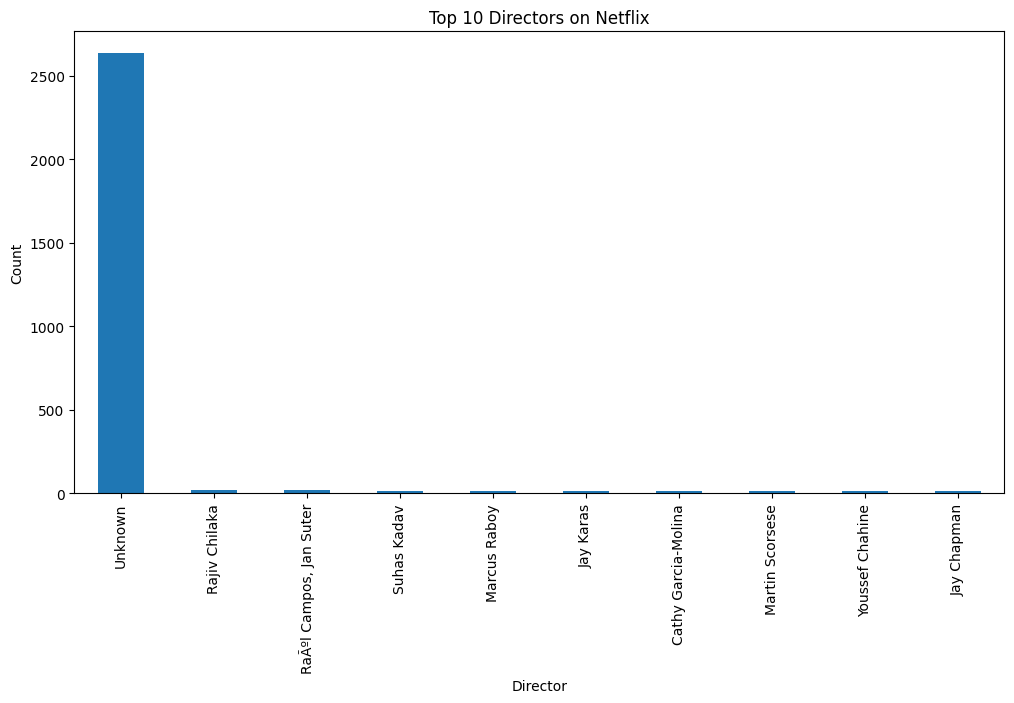

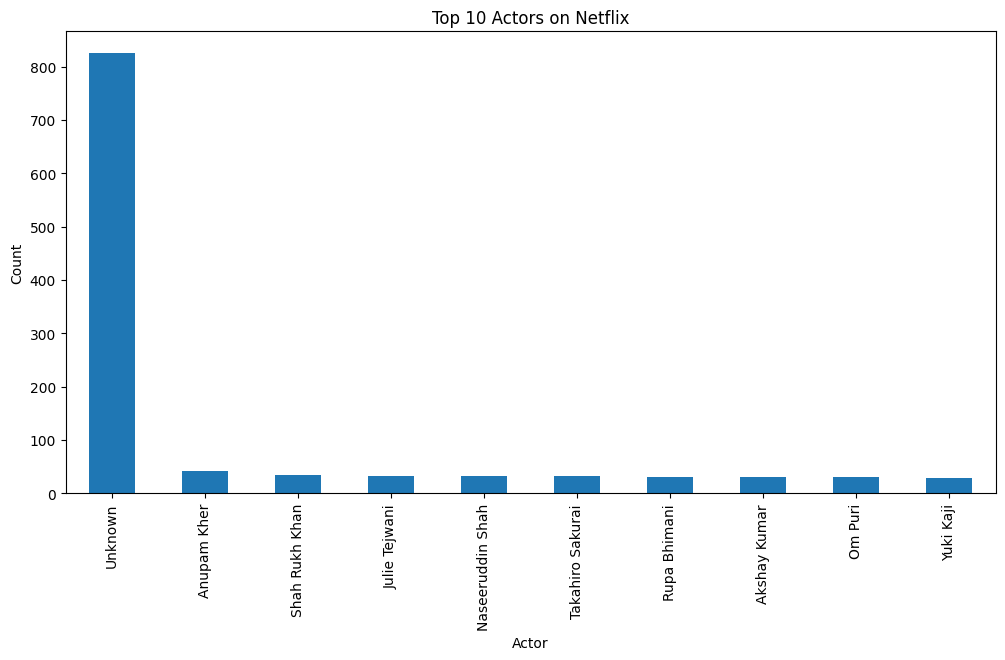

In [25]:
# Top directors and actors
top_directors = df['director'].value_counts().head(10)
top_actors = df['cast'].str.split(', ', expand=True).stack().value_counts().head(10)

plt.figure(figsize=(12,6))
top_directors.plot(kind='bar')
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Director')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12,6))
top_actors.plot(kind='bar')
plt.title('Top 10 Actors on Netflix')
plt.xlabel('Actor')
plt.ylabel('Count')
plt.show()

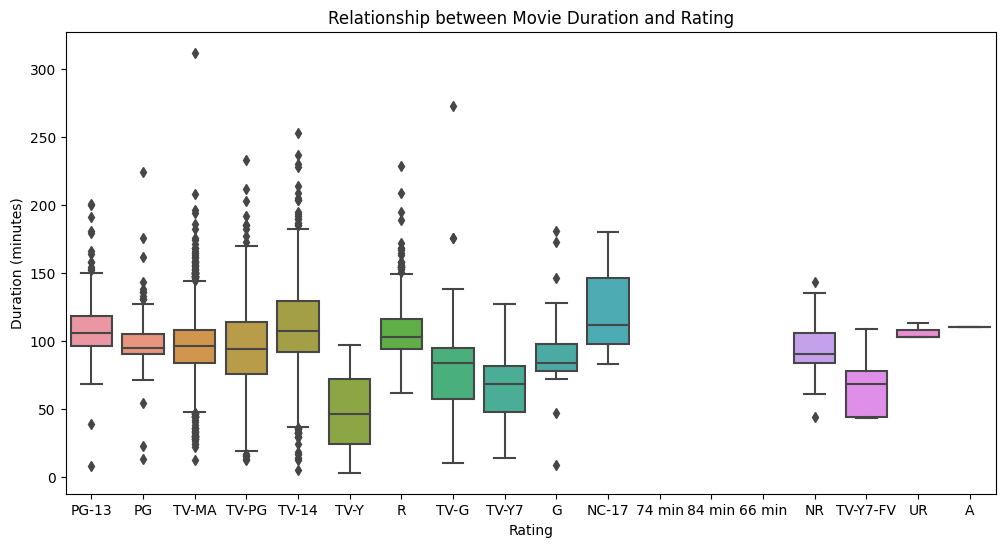

In [26]:
# Relationship between movie duration and rating
plt.figure(figsize=(12,6))
sns.boxplot(x='rating', y='duration', data=df[df['type'] == 'Movie'])
plt.title('Relationship between Movie Duration and Rating')
plt.xlabel('Rating')
plt.ylabel('Duration (minutes)')
plt.show()

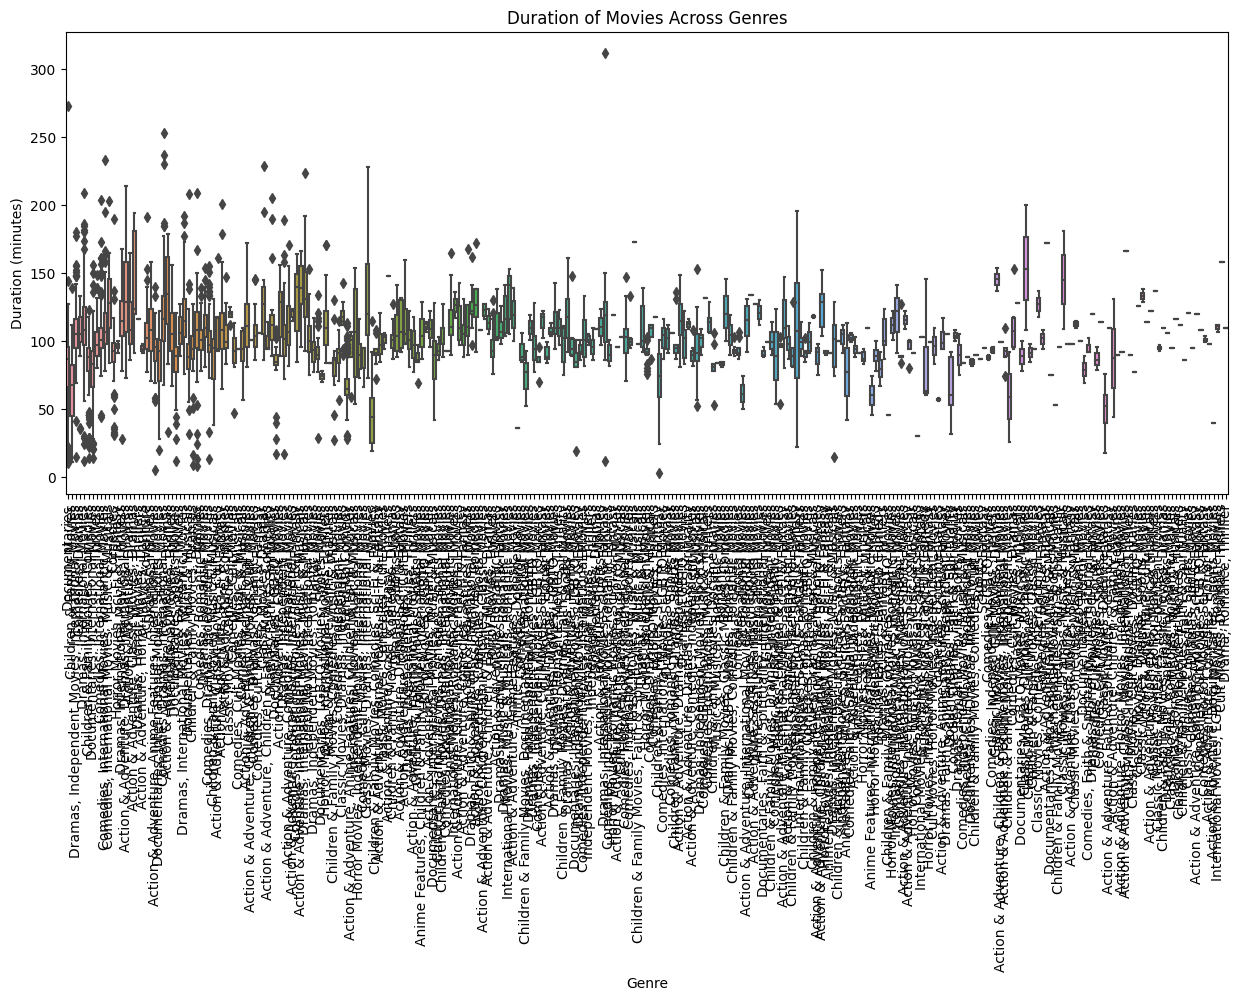

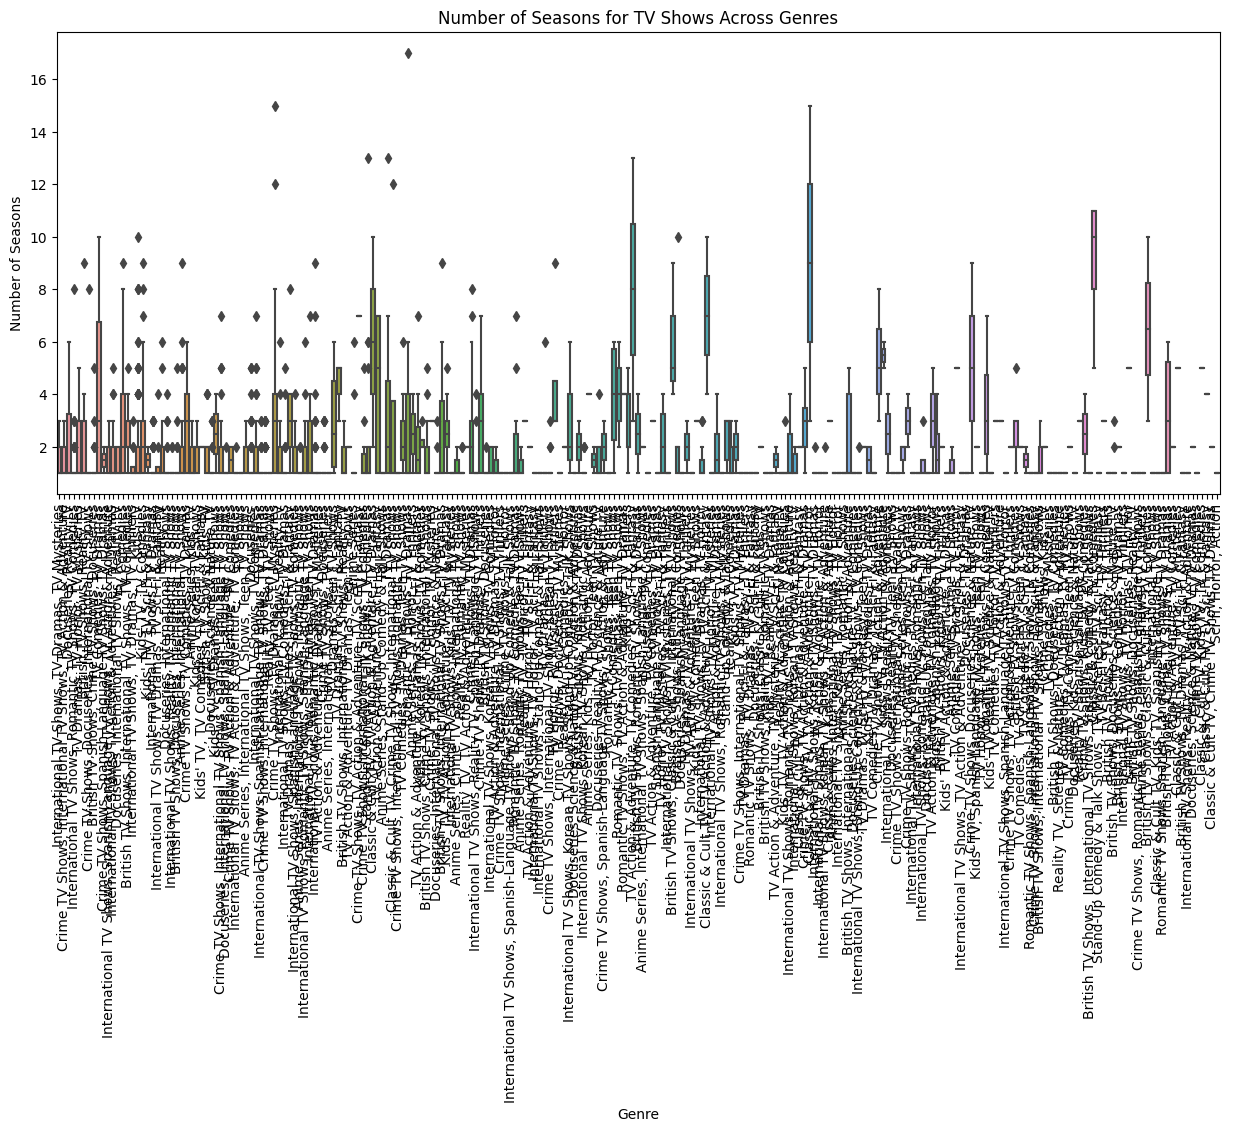

In [27]:
# Compare duration of movies and number of seasons for TV shows across genres
df_movies = df[df['type'] == 'Movie']
df_tvshows = df[df['type'] == 'TV Show']

plt.figure(figsize=(15,6))
sns.boxplot(x='listed_in', y='duration', data=df_movies)
plt.xticks(rotation=90)
plt.title('Duration of Movies Across Genres')
plt.xlabel('Genre')
plt.ylabel('Duration (minutes)')
plt.show()

plt.figure(figsize=(15,6))
sns.boxplot(x='listed_in', y='duration', data=df_tvshows)
plt.xticks(rotation=90)
plt.title('Number of Seasons for TV Shows Across Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Seasons')
plt.show()

# Insights Summary:
1. Distribution of Content Release Year:

* The majority of Netflix content was released after 2000, with a significant increase in titles released in recent years.

2. Count of Movies vs TV Shows:

* There are more movies than TV shows available on Netflix.

3. Genre Popularity:

* Drama, comedy, and documentary are among the most common genres on Netflix.
* The word cloud visualization highlights the prominence of these genres.

4. Content by Country:

* The United States produces the most content available on Netflix, followed by India and the United Kingdom.

5. Distribution of Age Ratings:

* Most titles are rated TV-MA, followed by TV-14 and TV-PG.

6. Duration Insights:

* Movies typically have a wide range of durations, while TV shows are mostly categorized by the number of seasons.

7. Temporal Trends:

* There has been a steady increase in the number of titles added to Netflix each year, with a noticeable spike in recent years.

8. Genre Popularity Over Time:

* The popularity of genres such as drama and comedy has remained high over the years, while other genres show varying trends.

9. Growth of Non-US Content:

* The number of non-US titles on Netflix has been growing, indicating Netflix's focus on international content.

10. Top Directors and Actors:

* The dataset reveals the most prolific directors and actors on Netflix, showcasing individuals with the most titles.

11. Relationship between Movie Duration and Rating:

* There is a noticeable variation in the duration of movies across different age ratings.

12. Genre Duration Comparison:

* The duration of movies and the number of seasons for TV shows vary significantly across different genres.

In [29]:
# Save the cleaned data
df.to_csv('cleaned_netflix_titles.csv', index=False)